In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm,t
import statsmodels as sm
import warnings
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
#from sklearn.preprocessing import train
warnings.filterwarnings('ignore')

### Scenario 1: Salary Prediction
    You have been provided the 'Salary' dataset. You have to predict salary for a given period of experience
    of a person
    Dataset Description:
    The dataset contains 2 features:
    YearsExperience: Eployee's years of experience
    Salary: Salary earned by the employee
    Tasks to be performed:
    1. Load the data, check its shape and check for null values - Beginner
    2. Split the dataset for training and testing - Beginner
    3. Implement Linear regression without using sklearn - Advanced
    4. Perform Prediction on test data - Intermediate
    5. Evaluate the model - Beginner
    6. Train the model using sklearn - Beginner
    7. Predict the salary on test data and evaluate the model - Beginner

In [3]:
df = pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


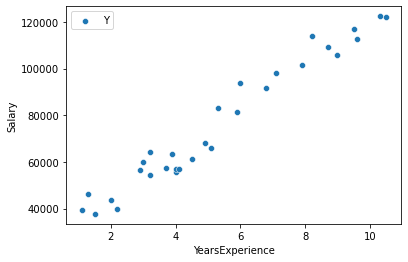

In [8]:
sns.scatterplot(data=df, x='YearsExperience', y='Salary')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend('Years Experience vs Salary')
plt.show()

In [11]:
# Tasks to be performed:
# 1. Load the data, check its shape and check for null values - Beginner
print(f'Shape of the Data: {df.shape}')
print(f"Do we have null's: {df.isna().any()}")

Shape of the Data: (30, 2)
Do we have null's: YearsExperience    False
Salary             False
dtype: bool


In [12]:
# Task 
# 2. Split the dataset for training and testing - Beginner

In [16]:
df_test = df.sample(9)

In [17]:
df_test.head()

,YearsExperience,Salary
0,1.1,39343.0
20,6.8,91738.0
18,5.9,81363.0
11,4.0,55794.0
13,4.1,57081.0


In [19]:
df_train = df[~df.index.isin(df_test.index)]
df_train.head()

,YearsExperience,Salary
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
5,2.9,56642.0
6,3.0,60150.0


In [25]:
std_x = df_train['YearsExperience'].std()
std_y = df_train['Salary'].std()
r = df_train.corr().iloc[0,1]
print(f'r: {r}')
m = r*(std_y/std_x)
print(f'm: {m}')

r: 0.9788562539497094
m: 9293.315753267601


In [27]:
mean_x = df_train['YearsExperience'].mean()
mean_y = df_train['Salary'].mean()

#y = mx + b
#b = (y - mx)
b = mean_y - m*mean_x
print(f'b: {b}')

b: 26753.096690361526


In [29]:
df_test['Salary^'] = m*df_test['YearsExperience'] + b
df_test                                      

,YearsExperience,Salary,Salary^
0,1.1,39343.0,36975.744019
20,6.8,91738.0,89947.643813
18,5.9,81363.0,81583.659635
11,4.0,55794.0,63926.359703
13,4.1,57081.0,64855.691279
21,7.1,98273.0,92735.638539
26,9.5,116969.0,115039.596346
8,3.2,64445.0,56491.707101
4,2.2,39891.0,47198.391348


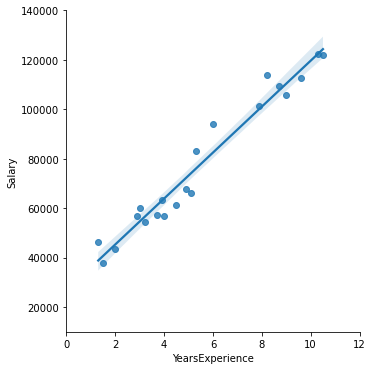

In [35]:
sns.lmplot(data=df_train, x='YearsExperience', y='Salary')
plt.ylim(10000, 140000)
plt.xlim(0, 12)
plt.show()

In [40]:
df_test['Error'] = (df_test['Salary'] - df_test['Salary^'])
df_test

,YearsExperience,Salary,Salary^,Error
0,1.1,39343.0,36975.744019,2367.255981
20,6.8,91738.0,89947.643813,1790.356187
18,5.9,81363.0,81583.659635,-220.659635
11,4.0,55794.0,63926.359703,-8132.359703
13,4.1,57081.0,64855.691279,-7774.691279
21,7.1,98273.0,92735.638539,5537.361461
26,9.5,116969.0,115039.596346,1929.403654
8,3.2,64445.0,56491.707101,7953.292899
4,2.2,39891.0,47198.391348,-7307.391348


In [43]:
sum(df_test['Error']**2)/df_test.shape[0]

31830763.590839524

In [57]:
#6. Train the model using sklearn
X_train, X_test, y_train, y_test = train_test_split(df[['YearsExperience']],df['Salary'],test_size= 0.3, random_state = 42)
print(X_train.shape, y_train.shape)

(21, 1) (21,)


In [64]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
result = lr.fit(X_train, y_train)

In [65]:
result.score(X_train, y_train)

0.9574526669392872

In [70]:
result.predict([[9]])

array([109970.17384923])

In [71]:
result.score(X_test, y_test)

0.9414466227178214

In [72]:
result.predict(X_test)

array([115573.62288352,  71679.93878159, 102498.90847018,  75415.57147111,
        55803.4998511 ,  60473.04071301, 122110.98009019, 107168.44933209,
        63274.76523015])

In [73]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
result = lr.fit(df_train.iloc[:,:-1], df_train.iloc[:,1:])

In [75]:
result.score(df_train.iloc[:,:-1], df_train.iloc[:,1:])

0.9581595658964579

In [78]:
y_hat = result.predict(df_test[['YearsExperience']])

In [79]:
result.intercept_

array([26753.09669036])

In [83]:
r2_score(df_test['Salary'], df_test['Salary^'])

0.9508483012457121

In [85]:
g = sum((df_test['Salary']-df_test['Salary^'])**2)
g

286476872.3175557

In [87]:
y = sum((df_test['Salary'] - df_test['Salary'].mean())**2)
y

5828422609.555555

In [88]:
1- g/y

0.9508483012457121

In [90]:
g/df_test.shape[0]

31830763.590839524

In [92]:
mean_squared_error(df_test['Salary'], df_test['Salary^'])

31830763.59083953